In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/train_delay_data.csv")

In [4]:
df

,station,scheduled_time,weather,day_of_week,is_holiday,is_delayed
0,Huda City Centre,01-05-2024 14:00,Sunny,Wednesday,0,0
1,Rajiv Chowk,01-05-2024 10:30,Sunny,Thursday,0,0
2,Dwarka Sec-21,01-05-2024 15:45,Foggy,Saturday,0,1
3,Noida City Centre,01-05-2024 17:00,Cloudy,Tuesday,0,0
4,Dwarka Sec-21,01-05-2024 16:00,Foggy,Monday,1,1
...,...,...,...,...,...,...
495,Central Secretariat,01-05-2024 19:00,Foggy,Saturday,0,1
496,Dwarka Sec-21,01-05-2024 19:30,Foggy,Monday,0,1
497,Kashmere Gate,01-05-2024 09:30,Foggy,Friday,0,1
498,Dwarka Sec-21,01-05-2024 10:45,Foggy,Tuesday,1,1


## Data Cleaning

In [5]:
df['scheduled_time'] = df['scheduled_time'].str.replace(":","").str.split(" ")

print(df['scheduled_time'])


0      [01-05-2024, 1400]
1      [01-05-2024, 1030]
2      [01-05-2024, 1545]
3      [01-05-2024, 1700]
4      [01-05-2024, 1600]
              ...        
495    [01-05-2024, 1900]
496    [01-05-2024, 1930]
497    [01-05-2024, 0930]
498    [01-05-2024, 1045]
499    [01-05-2024, 1100]
Name: scheduled_time, Length: 500, dtype: object


In [6]:
for i in range(500):
  df['scheduled_time'][i] = df['scheduled_time'][i][1]

print(df['scheduled_time'])


0      1400
1      1030
2      1545
3      1700
4      1600
       ... 
495    1900
496    1930
497    0930
498    1045
499    1100
Name: scheduled_time, Length: 500, dtype: object


/tmp/ipython-input-6-1744182792.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['scheduled_time'][i] = df['scheduled_time'][i][1]
/tmp/ipython-input-6-1744182792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [7]:
df['scheduled_time'] = df['scheduled_time'].astype(float)



In [8]:
df.dtypes

,0
station,object
scheduled_time,float64
weather,object
day_of_week,object
is_holiday,int64
is_delayed,int64


In [9]:
df

,station,scheduled_time,weather,day_of_week,is_holiday,is_delayed
0,Huda City Centre,1400.0,Sunny,Wednesday,0,0
1,Rajiv Chowk,1030.0,Sunny,Thursday,0,0
2,Dwarka Sec-21,1545.0,Foggy,Saturday,0,1
3,Noida City Centre,1700.0,Cloudy,Tuesday,0,0
4,Dwarka Sec-21,1600.0,Foggy,Monday,1,1
...,...,...,...,...,...,...
495,Central Secretariat,1900.0,Foggy,Saturday,0,1
496,Dwarka Sec-21,1930.0,Foggy,Monday,0,1
497,Kashmere Gate,930.0,Foggy,Friday,0,1
498,Dwarka Sec-21,1045.0,Foggy,Tuesday,1,1


In [10]:
day_mapping = {
    'Monday' :  1,
    'Tuesday' :  2,
    'Wednesday' :  3,
    'Thursday' :  4,
    'Friday' :  5,
    'Saturday' :  6,
    'Sunday' :  7,
}
df['day_of_week'] = df['day_of_week'].map(day_mapping)
df

,station,scheduled_time,weather,day_of_week,is_holiday,is_delayed
0,Huda City Centre,1400.0,Sunny,3,0,0
1,Rajiv Chowk,1030.0,Sunny,4,0,0
2,Dwarka Sec-21,1545.0,Foggy,6,0,1
3,Noida City Centre,1700.0,Cloudy,2,0,0
4,Dwarka Sec-21,1600.0,Foggy,1,1,1
...,...,...,...,...,...,...
495,Central Secretariat,1900.0,Foggy,6,0,1
496,Dwarka Sec-21,1930.0,Foggy,1,0,1
497,Kashmere Gate,930.0,Foggy,5,0,1
498,Dwarka Sec-21,1045.0,Foggy,2,1,1


In [11]:
weather_mapping = {
    'Sunny': 1,
    'Cloudy': 2,
    'Rainy': 3,
    'Foggy': 4
}
df['weather'] = df['weather'].map(weather_mapping)
df.dtypes



,0
station,object
scheduled_time,float64
weather,int64
day_of_week,int64
is_holiday,int64
is_delayed,int64


In [12]:
station_mapping = {
    'Rajiv Chowk' : 1,
    'Kashmere Gate' : 2,
    'Huda City Centre' : 3,
    'Noida City Centre' : 4,
    'Dwarka Sec-21' : 5,
    'Central Secretariat' : 6
}
df['station'] = df['station'].map(station_mapping)
df.dtypes

,0
station,int64
scheduled_time,float64
weather,int64
day_of_week,int64
is_holiday,int64
is_delayed,int64


## Basic Data Analysis

### Train delays on respective days

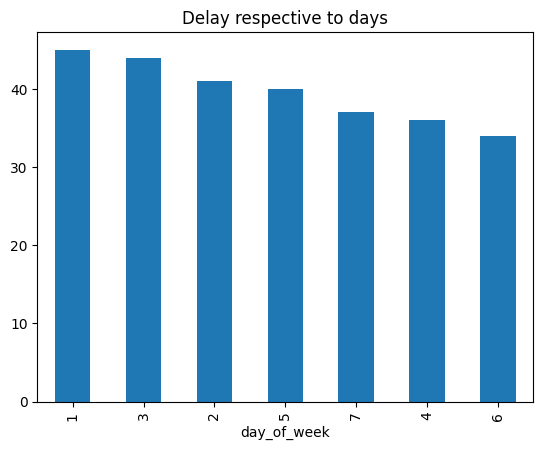

In [13]:
df[df['is_delayed'] == 1]['day_of_week'].value_counts().plot(kind = 'bar')
plt.title("Delay respective to days")
plt.show()

Conclusion: As we can see the most number of delays occur on a Monday and the least number of delays occur on a Saturday

### Train delays respective to stations

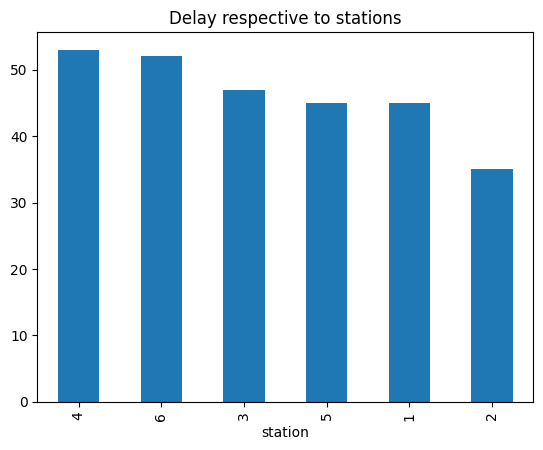

In [14]:
df[df['is_delayed'] == 1]['station'].value_counts().plot(kind = 'bar')
plt.title("Delay respective to stations")
plt.show()

Conclusion: Delay occurs at noida City Centre the maximum number of times and at Kashmere gate the minimum number of times

### Total minutes of delay(station wise)

Conclusion: The maximum delay(minutes) occurs at Rajiv Chowk and the minimum delay(minutes) occurs at kashmere Gate

## Delay depends upon the weather

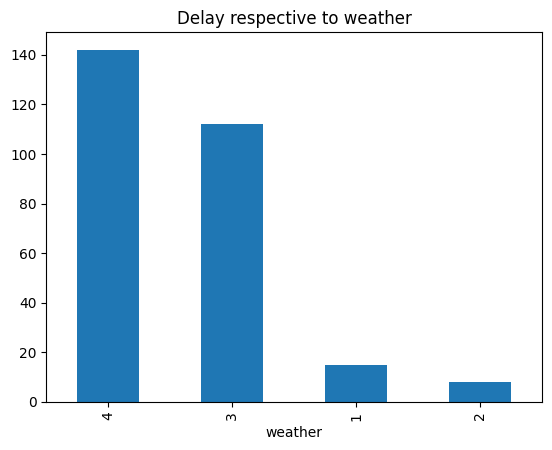

In [16]:
df[df['is_delayed'] == 1]['weather'].value_counts().plot(kind = 'bar')
plt.title("Delay respective to weather")
plt.show()

Conclusion: Most delays occur on a foggy day and least occur on a cloudy day

## Building model

### Data Preprocessing


In [19]:
# Define features (X)
X = df.drop('is_delayed', axis=1)

# Define the target variable (y)
y = df['is_delayed']


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<Axes: >

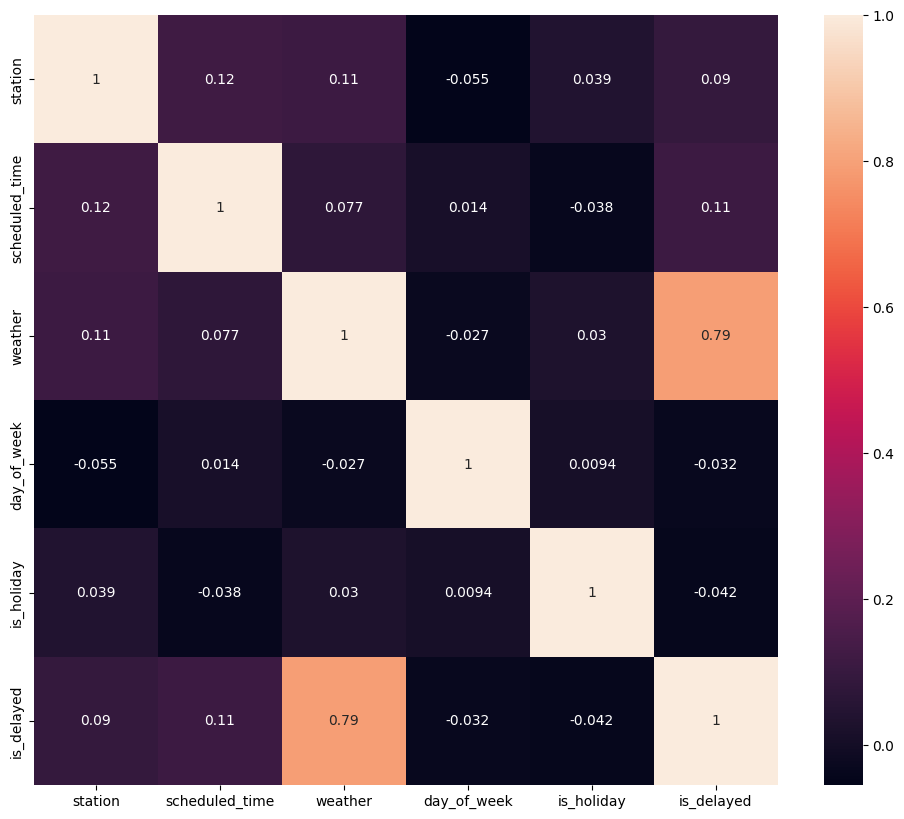

In [21]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

### Building an ANN model

In [69]:
# Define the model
model = Sequential([
                      Dense(10, activation='relu', input_shape=(5,)),
                      Dense(64, activation='relu'),
                      Dense(32, activation='relu'),
                      Dense(16, activation='relu'),
                      Dense(1, activation='sigmoid')
                  ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.1,batch_size = 50)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9454 - loss: 0.1806 - val_accuracy: 0.9500 - val_loss: 0.1760
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9450 - loss: 0.1781 - val_accuracy: 0.9500 - val_loss: 0.1831
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9294 - loss: 0.2160 - val_accuracy: 0.9500 - val_loss: 0.1788
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9347 - loss: 0.1934 - val_accuracy: 0.9500 - val_loss: 0.1816
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9518 - loss: 0.1595 - val_accuracy: 0.9500 - val_loss: 0.1791
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9542 - loss: 0.1515 - val_accuracy: 0.9500 - val_loss: 0.1828
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9502 - loss: 0.1619 - val_accuracy: 0.9500 - val_loss: 0.1831
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9609 - loss: 0.1441 - val_accuracy: 0.9500 - val_loss: 0.1800


In [75]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9262 - loss: 0.2676
Test accuracy: 0.9300


## Comparing with Random Forest and Logistic Regression

In [45]:
Ranfor = RandomForestClassifier(random_state = 42)
Ranfor.fit(X_train, y_train)
rf_preds = Ranfor.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
log_preds = log_reg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))

Random Forest Accuracy: 0.93
Logistic Regression Accuracy: 0.93


## Checking with custom input

In [79]:
# Example custom input
custom_data = {
    'station': ['Rajiv Chowk'],
    'scheduled_time': ['2024-05-01 07:00'],
    'weather': ['Rainy'],
    'day_of_week': ['Monday'],
    'is_holiday': [0],
}

custom_df = pd.DataFrame(custom_data)

# Apply the same preprocessing as the training data
# Convert time strings to numerical representation
custom_df['scheduled_time'] = custom_df['scheduled_time'].str.replace(":","").str.split(" ").str[1].astype(float)

# Map categorical features to numerical values
custom_df['day_of_week'] = custom_df['day_of_week'].map(day_mapping)
custom_df['weather'] = custom_df['weather'].map(weather_mapping)
custom_df['station'] = custom_df['station'].map(station_mapping)

# Scale the custom input using the same scaler
custom_input_scaled = scaler.transform(custom_df)

# Get the prediction
custom_prediction_rn = Ranfor.predict(custom_input_scaled)
custom_predicted_class_1 = (custom_prediction_rn > 0.5).astype("int32")

print("Custom Input Prediction with custom Random Forest: ")
print(custom_prediction_rn)
print("\nCustom Input Predicted class (0 for no delay, 1 for delay):")
print(custom_predicted_class_1)

custom_prediction_lr = log_reg_model.predict(custom_input_scaled)
custom_predicted_class_2 = (custom_prediction_lr > 0.5).astype("int32")

print("Custom Input Prediction with custom made Logistic Regression: ")
print(custom_prediction_lr)
print("\nCustom Input Predicted class (0 for no delay, 1 for delay):")
print(custom_predicted_class_2)

custom_prediction_NN = model.predict(custom_input_scaled)
custom_predicted_class = (custom_prediction_NN > 0.5).astype("int32")

print("Custom Input Prediction with custom made ANN model: ")
print(custom_prediction_NN)
print("\nCustom Input Predicted class (0 for no delay, 1 for delay):")
print(custom_predicted_class)

Custom Input Prediction with custom Random Forest: 
[1]

Custom Input Predicted class (0 for no delay, 1 for delay):
[1]
Custom Input Prediction with custom made Logistic Regression: 
[1]

Custom Input Predicted class (0 for no delay, 1 for delay):
[1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Custom Input Prediction with custom made ANN model: 
[[0.9709134]]

Custom Input Predicted class (0 for no delay, 1 for delay):
[[1]]
